## 数値解析レポート課題第14回
### 氏名：NOH, HYEONSEO　　学籍番号：08B22164
次の定積分
$$
\begin{align}
f(x) &= \sqrt{2-x} \\
F &= \int^2_1 f(x)dx
\end{align}
$$
をモンテカルロ法で求めよ．ただし，生成する乱数の数$N$は、$N = 100, 1000, 10000$の3パターン．

モンテカルロ法では区間$[a,b]$で一様乱数$v_i$を生成して
$$
\omega_i = (b-a)f(v_i)
$$
とする．これを繰り返して
$$
\int^b_a f(x)dx \approx \bar{\omega_i} = \frac{b-a}{N}\sum^N_{i=1}f(v_i) 
$$
と定積分の値を推定できる．
また，手計算を行うと，定積分の結果は
$$
F = \int^2_1\sqrt{2-x}dx = \frac{2}{3}
$$
となる．

In [343]:
import numpy as np
import matplotlib.pyplot as plt
import random
def f1(x):
    return np.sqrt(2-x)

a = 1
b = 2

def Montecarlo(N):
    sumf = 0
    for n in range(N):
        x = random.uniform(a,b)
        sumf += f1(x)

    F = (b-a)/N*sumf
    return F

In [344]:
F100 = Montecarlo(100)
F100

0.6609915606078336

In [345]:
F1000 = Montecarlo(1000)
F1000

0.6591868919418927

In [346]:
F10000 = Montecarlo(10000)
F10000

0.6642951131100173

モンテカルロ法を用いて$𝑁=100,1000,10000$の時の定積分の推定値を求めると上のようになった．
乱数を用いていて実行するたびに$x$の値が変わってしまい，推定値の結果も変わる．そのため，繰り返して計算し，その平均値を求めて比較してみる．

In [347]:
def repeatmontecarlo(N, r):
    results = [Montecarlo(N) for i in range(r)]
    mean = np.mean(results)
    return results, mean

In [348]:
results1, mean1 = repeatmontecarlo(100, 100)
mean1

0.671062574867822

In [349]:
results2, mean2 = repeatmontecarlo(1000, 100)
mean2

0.668187024297403

In [350]:
results3, mean3 = repeatmontecarlo(10000, 100)
mean3

0.6666479189260563

それぞれの平均値と手計算した値$\frac{2}{3}$をグラフに描き，比較してみる．

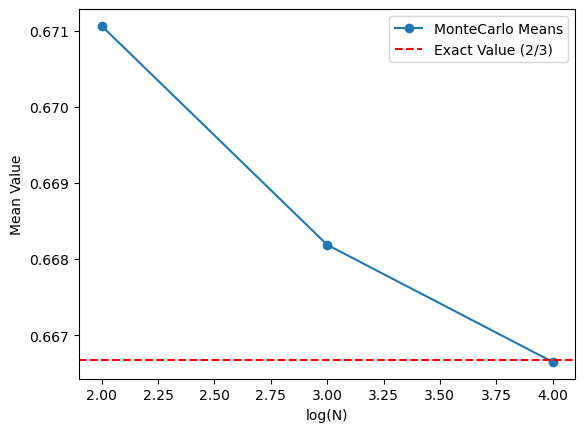

In [351]:
theoretical_value = 2 / 3

#乱数の生成回数Nのlogをとってグラフの間隔を一定にした
iterations = [2, 3, 4]

#N=100, 1000, 10000の時の平均値をリストに
means = [mean1, mean2, mean3]

plt.plot(iterations, means, label='MonteCarlo Means', marker='o')
plt.axhline(theoretical_value, color='r', linestyle='--', label='Exact Value (2/3)')

plt.xlabel('log(N)')
plt.ylabel('Mean Value')
plt.legend()

plt.show()

乱数を使っていて実行するたびに結果が変わるので今どのような結果になっているか分からないが，何回か実行してみた結果，乱数の生成回数の増加につれ，正確な値に近づいていくことが分かる．せっかくresults1, results2, results3とそれぞれの計算結果を求めたので，それもグラフで表してみる．

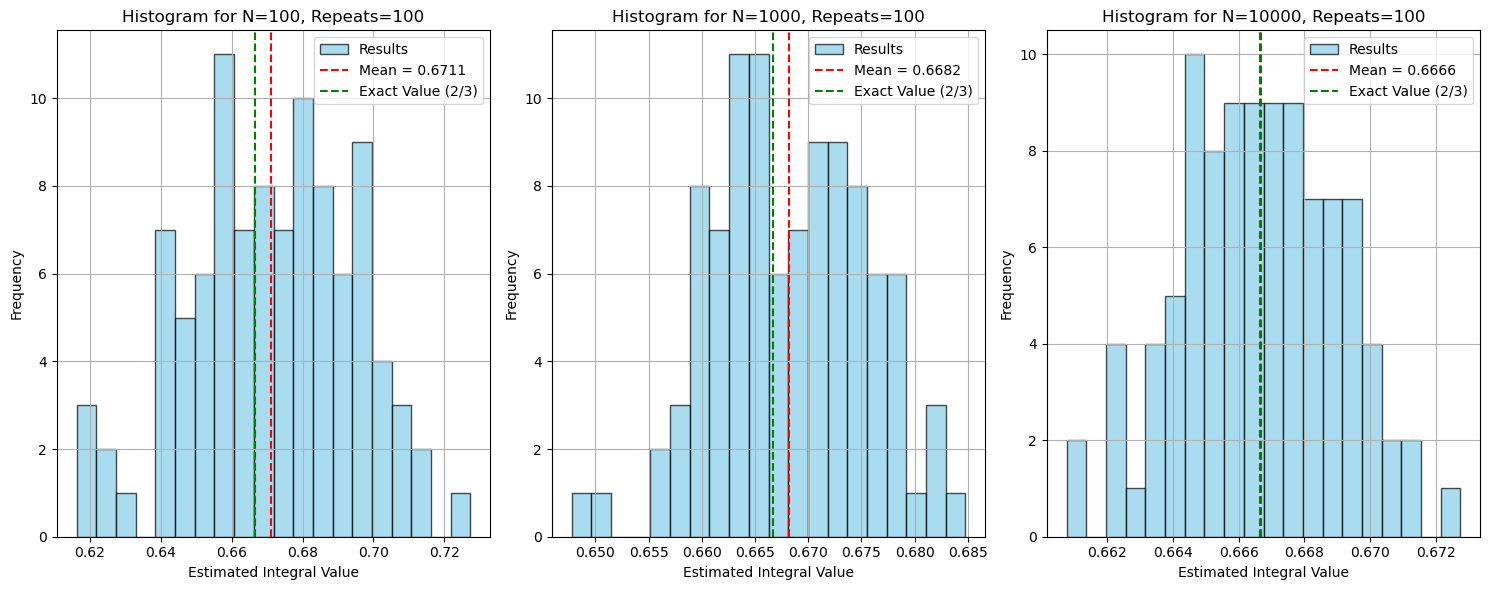

In [352]:
def plot_comparison(results_list, means_list, sample_sizes):
    plt.figure(figsize=(15, 6))
    
    for i, (results, mean, N) in enumerate(zip(results_list, means_list, sample_sizes)):
        plt.subplot(1, 3, i + 1)
        plt.hist(results, bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Results')
        plt.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.4f}")
        plt.axvline(2/3, color='green', linestyle='--', label="Exact Value (2/3)")
        plt.title(f"Histogram for N={N}, Repeats={len(results)}")
        plt.xlabel("Estimated Integral Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

results_list = [results1, results2, results3]
means_list = [mean1, mean2, mean3]
sample_sizes = [100, 1000, 10000]

plot_comparison(results_list, means_list, sample_sizes)

このグラフより，乱数の生成回数が増えるほどばらつきが小さくなることがわかる．特にモンテカルロ法では乱数を使っているため，サンプル数が結果に大きく影響すると考えられる．